In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
import os 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
summary=pd.read_csv('/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv')
metadata=pd.read_csv('/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')

In [4]:
summary


,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4
5,5,Pnemonia,bacteria,NaN,2772
6,6,Pnemonia,bacteria,Streptococcus,5


In [5]:
summary.Label_1_Virus_category.value_counts()

Virus             3
bacteria          2
Stress-Smoking    1
Name: Label_1_Virus_category, dtype: int64

In [6]:
metadata

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [7]:
metadata.Label_1_Virus_category.value_counts()

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [8]:
train_data=metadata[metadata['Dataset_type']=='TRAIN']

In [9]:
train_data.shape

(5286, 6)

In [10]:
train_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [11]:
train_data.isna().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5217
Label_1_Virus_category    1342
dtype: int64

In [12]:
train_data['Label_1_Virus_category'].value_counts()

bacteria          2535
Virus             1407
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [13]:
train_data=train_data.fillna('n/a')

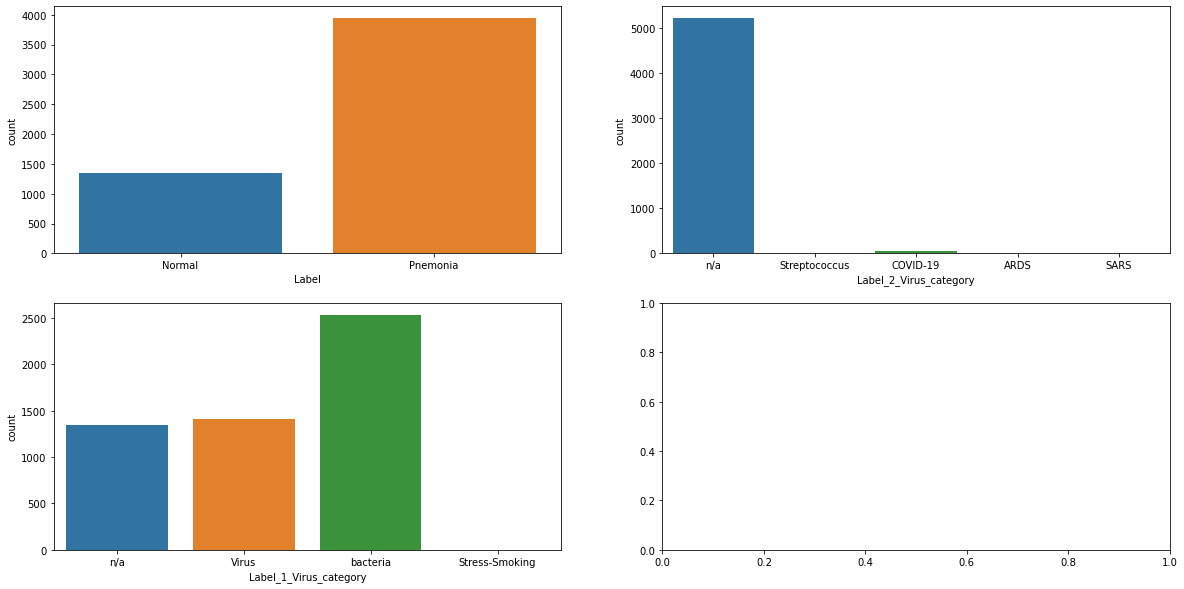

In [14]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig,ax=plt.subplots(2,2, figsize=(20, 10))
sns.countplot(x=targets[0],data=train_data, ax=ax[0, 0])
sns.countplot(x=targets[1],data=train_data, ax=ax[0, 1])
sns.countplot(x=targets[2],data=train_data, ax=ax[1, 0])
plt.show()

In [15]:
TRAIN_FOLDER = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

In [16]:
sample_train_images = list(os.walk(TRAIN_FOLDER))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_train_images))

In [17]:
sample_train_images 

['/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1180_virus_2010.jpeg',
 '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1230_virus_2081.jpeg',
 '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1513_virus_2632.jpeg',
 '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0771-0001.jpeg',
 '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person124_virus_238.jpeg',
 '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person746_virus_1369.jpeg',
 '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person588_bacteria_2422.jpeg',
 '/kaggle/input/corona

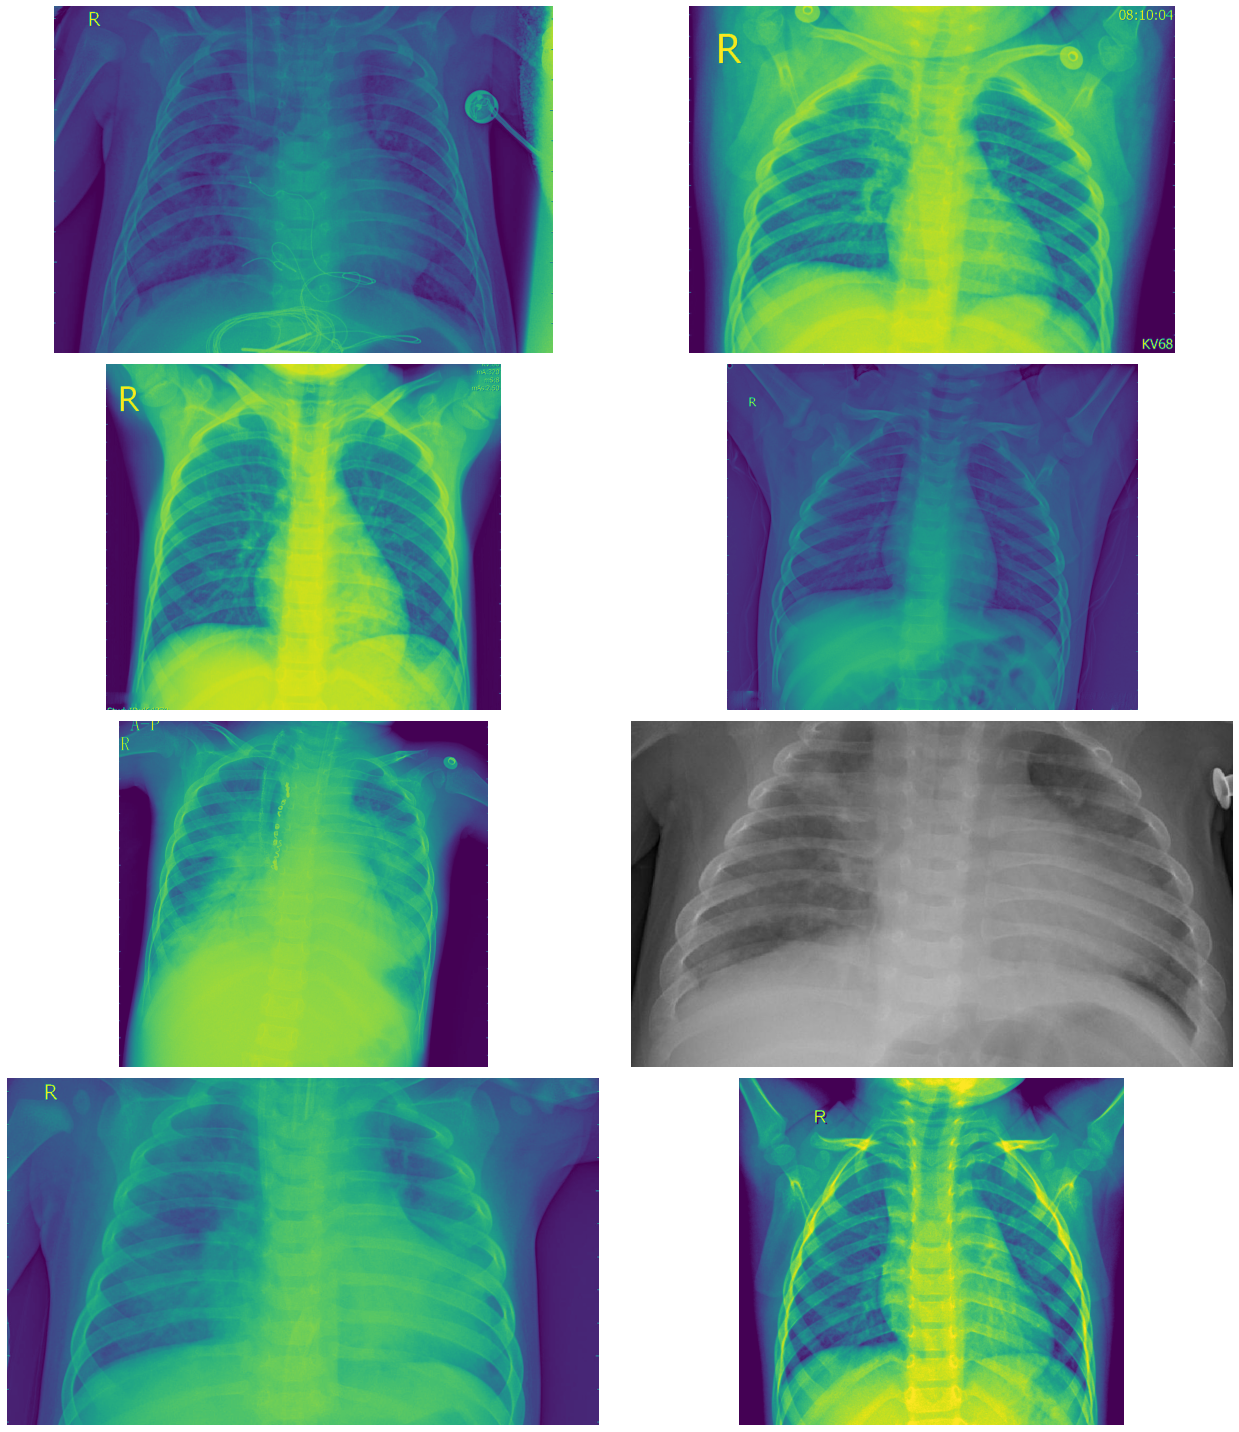

In [18]:
plt.figure(figsize=(20, 20))

for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4, 2, iterator+1)
    plt.axis('off')
    plt.imshow(image)


plt.tight_layout()


In [19]:
balanced_data=train_data[(train_data['Label']=='Normal')| 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]

In [20]:
balanced_data['target'] =['negative' if holder == 'Normal' else 'positive' for holder in balanced_data['Label']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
from sklearn.utils import shuffle
balanced_data_subset_normal=balanced_data[balanced_data['target']=='negative']
balanced_data_subset_covid=balanced_data[balanced_data['target']=='positive']
balanced_data_frac_normal = balanced_data_subset_normal.sample(frac=(1/5))

balanced_data_concat = pd.concat([balanced_data_frac_normal, balanced_data_subset_covid], axis=0)
balanced_data_concat = shuffle(balanced_data_concat, random_state=0)
balanced_data_train = balanced_data_concat[:240]
balanced_data_validation = balanced_data_concat[240:]


In [22]:
balanced_data_train.target.value_counts()

negative    203
positive     37
Name: target, dtype: int64

In [23]:
train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]
train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in train_data['Label']]

train_data = shuffle(train_data, random_state=1)

validation_data = train_data.iloc[1000:, :]

In [24]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)


train_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=validation_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)


Found 1400 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [25]:
def schedule(epoch):
    if epoch<5:
        return 0.0001
    else:
        print(' learning rate')
        return  0.0001 * np.exp(0.5 * (5 - epoch))

In [26]:
from keras.metrics import *
from keras.callbacks import LearningRateScheduler
custom_callback = LearningRateScheduler(schedule)

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
]

In [27]:
model=Sequential([
Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
MaxPooling2D((3,3)),
Conv2D(32,(3,3),activation='relu'),
MaxPooling2D((3,3)),
Conv2D(32,(3,3),activation='relu'),
Flatten(),
Dense(64,activation='relu'),
Dropout(0.2),
Dense(16,activation='relu'),
Dropout(0.2),
Dense(1,activation='sigmoid')])

In [28]:
model.compile(optimizer=Adam(),loss=binary_crossentropy,metrics=METRICS)

In [29]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


88/88 [==============================] - 102s 1s/step - loss: 0.2518 - tp: 1.0000 - fp: 11.0000 - tn: 1331.0000 - fn: 57.0000 - accuracy: 0.9514 - precision: 0.0833 - recall: 0.0172 - val_loss: 0.3104 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
88/88 [==============================] - 86s 978ms/step - loss: 0.1896 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 58.0000 - accuracy: 0.9586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0084 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
88/88 [==============================] - 85s 963ms/step - loss: 0.1532 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 58.0000 - accuracy: 0.9586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0098 - val_tp: 0.0000e+00 - val_fp: 

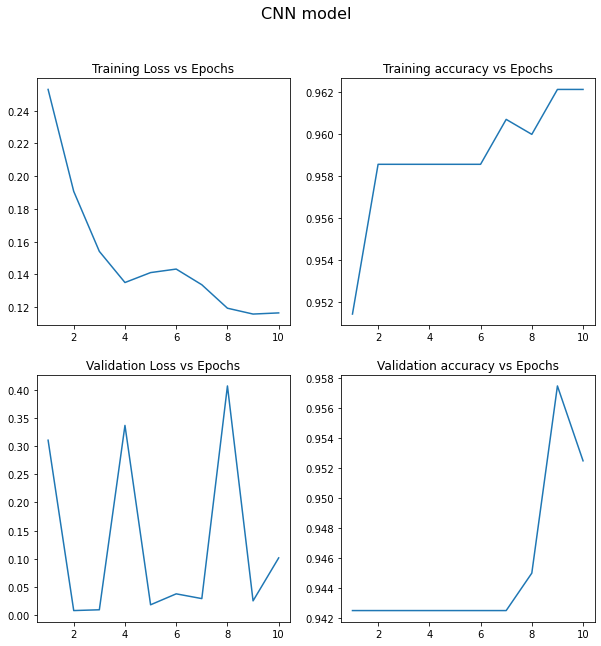

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('CNN model', size=16)
plt.show()